In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../ML_venv/dataSet.csv")

In [2]:
df.head()
# feature_names = df.columns.tolist()
# print(feature_names)

ResponseId                                         MainBranch  \
0           1                                      None of these   
1           2                     I am a developer by profession   
2           3  I am not primarily a developer, but I write co...   
3           4                     I am a developer by profession   
4           5                     I am a developer by profession   

            Employment                            RemoteWork  \
0                  NaN                                   NaN   
1  Employed, full-time                          Fully remote   
2  Employed, full-time  Hybrid (some remote, some in-person)   
3  Employed, full-time                          Fully remote   
4  Employed, full-time  Hybrid (some remote, some in-person)   

                           CodingActivities  \
0                                       NaN   
1  Hobby;Contribute to open-source projects   
2                                     Hobby   
3              I don’t code outside of work   
4                                     Hobby   

                                           EdLevel  \
0                                              NaN   
1                                              NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)   

                                           LearnCode  \
0                                                NaN   
1                                                NaN   
2  Books / Physical media;Friend or family member...   
3  Books / Physical media;School (i.e., Universit...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline LearnCodeCoursesCert  \
0                                                NaN                  NaN   
1                                                NaN                  NaN   
2  Technical documentation;Blogs;Programming Game...                  NaN   
3                                                NaN                  NaN   
4  Technical documentation;Blogs;Stack Overflow;O...                  NaN   

  YearsCode  ... TimeSearching TimeAnswering Onboarding ProfessionalTech  \
0       NaN  ...           NaN           NaN        NaN              NaN   
1       NaN  ...           NaN           NaN        NaN              NaN   
2        14  ...           NaN           NaN        NaN              NaN   
3        20  ...           NaN           NaN        NaN              NaN   
4         8  ...           NaN           NaN        NaN              NaN   

  TrueFalse_1 TrueFalse_2 TrueFalse_3           SurveyLength  \
0         NaN         NaN         NaN                    NaN   
1         NaN         NaN         NaN               Too long   
2         NaN         NaN         NaN  Appropriate in length   
3         NaN         NaN         NaN  Appropriate in length   
4         NaN         NaN         NaN               Too long   

                   SurveyEase ConvertedCompYearly  
0                         NaN                 NaN  
1                   Difficult                 NaN  
2  Neither easy nor difficult             40205.0  
3                        Easy            215232.0  
4                        Easy                 NaN  

[5 rows x 79 columns]

In [2]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly" : "Salery"}, axis=1)
df.head()


Country  \
0                                                NaN   
1                                             Canada   
2  United Kingdom of Great Britain and Northern I...   
3                                             Israel   
4                           United States of America   

                                           EdLevel YearsCodePro  \
0                                              NaN          NaN   
1                                              NaN          NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   

            Employment    Salery  
0                  NaN       NaN  
1  Employed, full-time       NaN  
2  Employed, full-time   40205.0  
3  Employed, full-time  215232.0  
4  Employed, full-time       NaN

In [3]:
df["Salery"].fillna(df["Salery"].mean(), inplace = True)
df.head()

Country  \
0                                                NaN   
1                                             Canada   
2  United Kingdom of Great Britain and Northern I...   
3                                             Israel   
4                           United States of America   

                                           EdLevel YearsCodePro  \
0                                              NaN          NaN   
1                                              NaN          NaN   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   

            Employment         Salery  
0                  NaN  170761.277849  
1  Employed, full-time  170761.277849  
2  Employed, full-time   40205.000000  
3  Employed, full-time  215232.000000  
4  Employed, full-time  170761.277849

In [4]:
df["Country"].fillna(df["Country"].mode()[0], inplace = True)
df["EdLevel"].fillna(df["EdLevel"].mode()[0], inplace = True)
df["YearsCodePro"].fillna(df["YearsCodePro"].mode()[0], inplace = True)
df["Employment"].fillna(df["Employment"].mode()[0], inplace = True)

In [5]:
df.head()


Country  \
0                           United States of America   
1                                             Canada   
2  United Kingdom of Great Britain and Northern I...   
3                                             Israel   
4                           United States of America   

                                           EdLevel YearsCodePro  \
0     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   
1     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   
2  Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            5   
3     Bachelor’s degree (B.A., B.S., B.Eng., etc.)           17   
4     Bachelor’s degree (B.A., B.S., B.Eng., etc.)            3   

            Employment         Salery  
0  Employed, full-time  170761.277849  
1  Employed, full-time  170761.277849  
2  Employed, full-time   40205.000000  
3  Employed, full-time  215232.000000  
4  Employed, full-time  170761.277849

In [6]:
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salery          0
dtype: int64

In [7]:
df['Country'].value_counts()

United States of America                                15040
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
                                                        ...  
Monaco                                                      1
Djibouti                                                    1
Seychelles                                                  1
Solomon Islands                                             1
Saint Kitts and Nevis                                       1
Name: Country, Length: 180, dtype: int64

In [8]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [9]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

United States of America                                15040
Other                                                    9740
India                                                    6639
Germany                                                  5395
United Kingdom of Great Britain and Northern Ireland     4190
Canada                                                   2490
France                                                   2328
Brazil                                                   2109
Poland                                                   1732
Netherlands                                              1555
Spain                                                    1521
Italy                                                    1514
Australia                                                1462
Russian Federation                                       1229
Turkey                                                   1020
Sweden                                                   1020
Switzerl

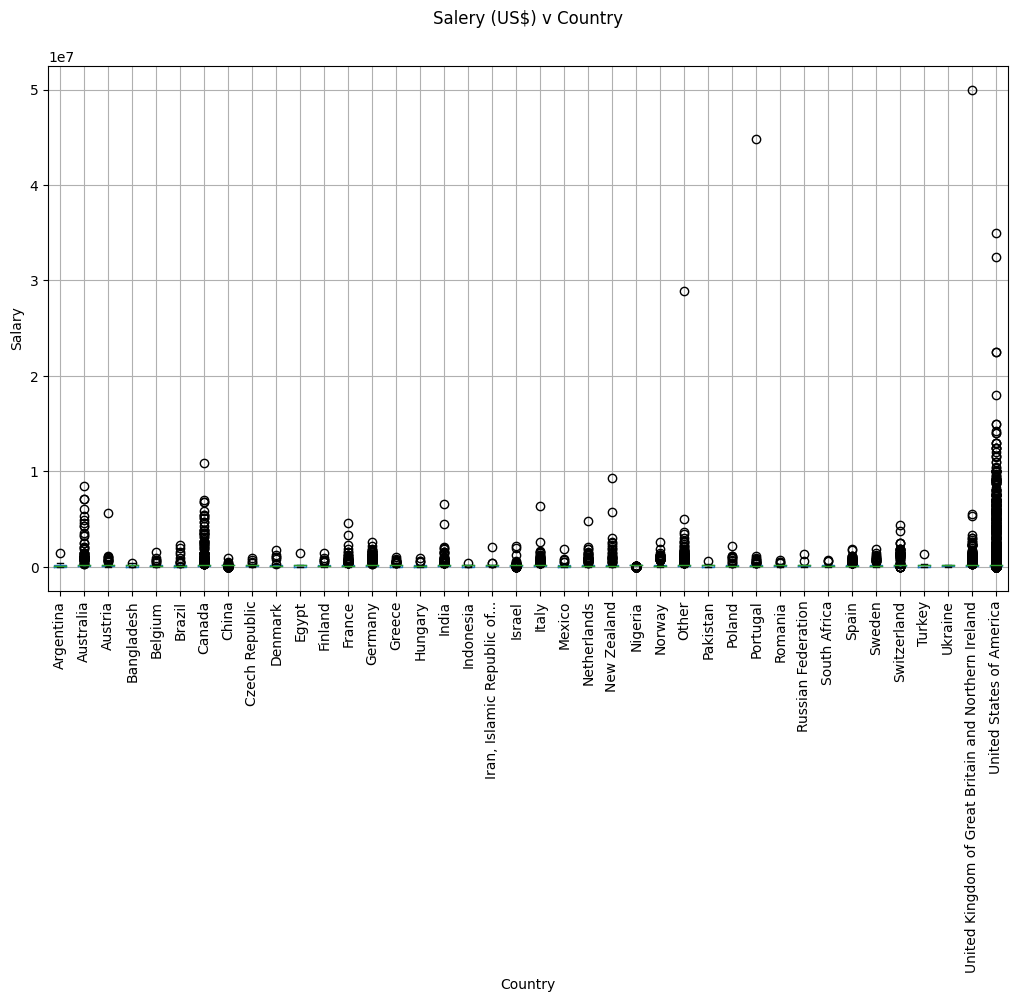

In [10]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salery', 'Country', ax=ax)
plt.suptitle('Salery (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [11]:
df = df[df['Salery'] <=25000]
df = df[df['Salery'] >=10000]
df = df[df['Country'] !='Other']

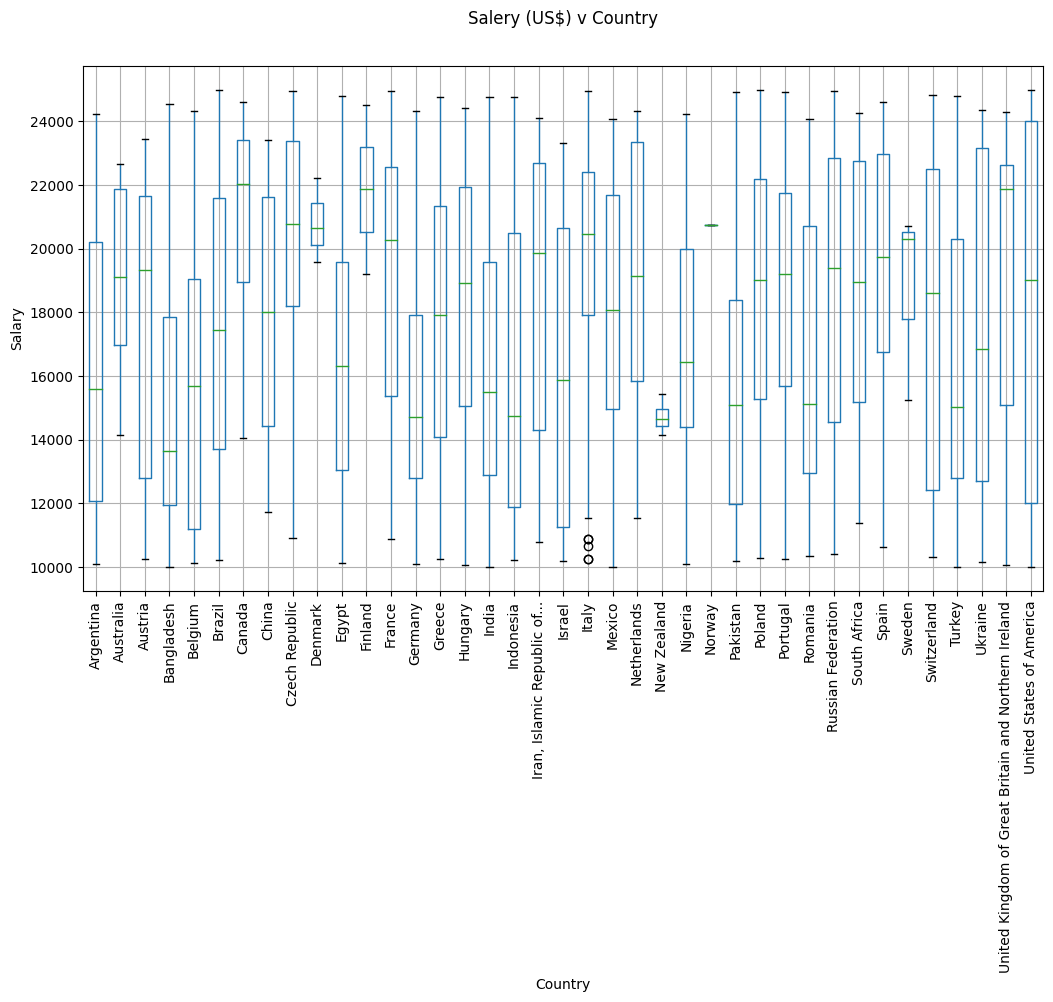

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salery', 'Country', ax=ax)
plt.suptitle('Salery (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df['YearsCodePro'].unique()

array(['4', '20', '7', '12', 'Less than 1 year', '1', '2', '5', '3', '8',
       '34', '6', '10', '13', '17', '11', '16', '15', '9', '30', '19',
       '25', '14', '23', '24', '26', '18', '37', '21', '45', '22', '27',
       '29', '28', '40', '32', '31', '35', '38', '36',
       'More than 50 years', '43'], dtype=object)

In [14]:
def cleanYearsExp(x):
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 50
    return float(x)

In [15]:
df['YearsCodePro'] = df['YearsCodePro'].apply(cleanYearsExp)
df['YearsCodePro'].unique()

array([ 4. , 20. ,  7. , 12. ,  0.5,  1. ,  2. ,  5. ,  3. ,  8. , 34. ,
        6. , 10. , 13. , 17. , 11. , 16. , 15. ,  9. , 30. , 19. , 25. ,
       14. , 23. , 24. , 26. , 18. , 37. , 21. , 45. , 22. , 27. , 29. ,
       28. , 40. , 32. , 31. , 35. , 38. , 36. , 50. , 43. ])

In [16]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)', 'Something else',
       'Primary/elementary school',
       'Other doctoral degree (Ph.D., Ed.D., etc.)'], dtype=object)

In [17]:
def CleanEdLevel(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than Bachelors'
df['EdLevel'] = df['EdLevel'].apply(CleanEdLevel)

In [18]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than Bachelors',
       'Post grad'], dtype=object)

In [41]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()


array([0, 2, 1, 3], dtype=int64)

In [42]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([ 8,  5, 35, 20, 16, 30, 21, 13, 32, 14,  0, 15,  7,  9,  3, 19, 27,
       12, 28, 29, 37, 18, 26, 17, 10, 38,  1, 31,  2, 34, 36, 33, 24,  6,
        4, 22, 23, 25, 11], dtype=int64)

In [21]:

def CleanEmployment(x):
    if 'full-time' in x and 'Employed' in x:
        return 'full-time'
    if 'part-time' in x and 'Employed' in x:
        return 'part-time'
    if 'full-time' in x and 'freelancer' in x:
        return 'full-time freelancer'
    if 'part-time' in x and 'freelancer' in x:
        return  'part-time freelancer'
    return 'freelancer'
df['Employment'] = df['Employment'].apply(CleanEmployment)
df['Employment'].unique()

array(['full-time', 'part-time', 'freelancer'], dtype=object)

In [22]:
le_emp = LabelEncoder()
df['Employment'] = le_emp.fit_transform(df['Employment'])
df['Employment'].unique()

array([1, 2, 0])

In [23]:
X = df.drop("Salery", axis = 1)
Y = df["Salery"]

In [24]:
Y.head()

16     19224.0
66     24924.0
99     12024.0
123    21120.0
151    15480.0
Name: Salery, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, Y.values)

LinearRegression()

In [31]:
y_pred = linear_reg.predict(X)
y_pred.head()

array([16979.43510022, 19163.49201401, 18110.14271335, ...,
       17187.56119591, 17714.81477969, 16806.04285005])

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(Y, y_pred))

In [29]:
error

4404.053362034421

In [32]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, Y.values)

DecisionTreeRegressor(random_state=0)

In [33]:
y_pred = dec_tree_reg.predict(X)

In [34]:
error = np.sqrt(mean_squared_error(Y, y_pred))

In [36]:
print(error)

3224.0056934659624


In [53]:
x = np.array([["United States", 'Master degree', 'full-time', 15]])
x

array([['United States', 'Master degree', 'full-time', '15']],
      dtype='<U13')

In [54]:
x[:, 0] = le_country.fit_transform(x[:, 0])
x[:, 1] = le_education.fit_transform(x[:, 1])
x[:, 2] = le_emp.fit_transform(x[:, 2])
x = x.astype(float)

In [56]:
x


array([[ 0.,  0.,  0., 15.]])